# Análise Exploratória dos Dados


In [78]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import requests


In [2]:
base = pd.read_csv("teste_indicium_precificacao.csv")

#### Visualizar a base que importamos

In [3]:
base.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
base.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


#### Saber o tamanho da base

In [5]:
base.shape

(48894, 16)

#### Visualizar a base que importamos e o tamanho da base

In [6]:
display(base)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Verificar valores nulos e tipo de dados

In [17]:
#### Descobrindo o período da análise

In [22]:

# Convert the 'ultima_review' column to datetime with errors='coerce'
base['ultima_review'] = pd.to_datetime(base['ultima_review'], errors='coerce')

# Filter out NaN values
valid_dates = base['ultima_review'].dropna()

# Get the minimum date
inicio = valid_dates.dt.date.min()
print(inicio)


2011-03-28


In [23]:


# Convert the 'ultima_review' column to datetime with errors='coerce'
base['ultima_review'] = pd.to_datetime(base['ultima_review'], errors='coerce')

# Filter out NaN values
valid_dates = base['ultima_review'].dropna()

# Get the minimum date
inicio = valid_dates.dt.date.max()
print(inicio)


2019-07-08


In [24]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-null  int64         
 11  numero_de_revie

#### Verificando o tipo dos dados

In [25]:
base.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

#### Verificando a existência de valores nulos

In [26]:
base.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

#### Entendendo melhor os valores nulos

In [27]:
base['nome'].value_counts()

nome
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47904, dtype: int64

In [28]:
base['host_name'].value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 293
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [29]:
base['ultima_review'].value_counts()

ultima_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2015-01-21       1
2015-01-18       1
2014-06-27       1
2013-04-09       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [30]:
base['reviews_por_mes'].value_counts()

reviews_por_mes
0.02     919
1.00     893
0.05     893
0.03     804
0.16     667
        ... 
9.53       1
9.74       1
6.06       1
8.25       1
10.54      1
Name: count, Length: 937, dtype: int64

#### Analisando as informações estatísticas

In [31]:
base.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,2018-10-04 01:46:50.710055936,1.373251,7.144005,112.776169
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,NaN,1.680453,32.952855,131.618692


#### Entendendo melhor essas informações

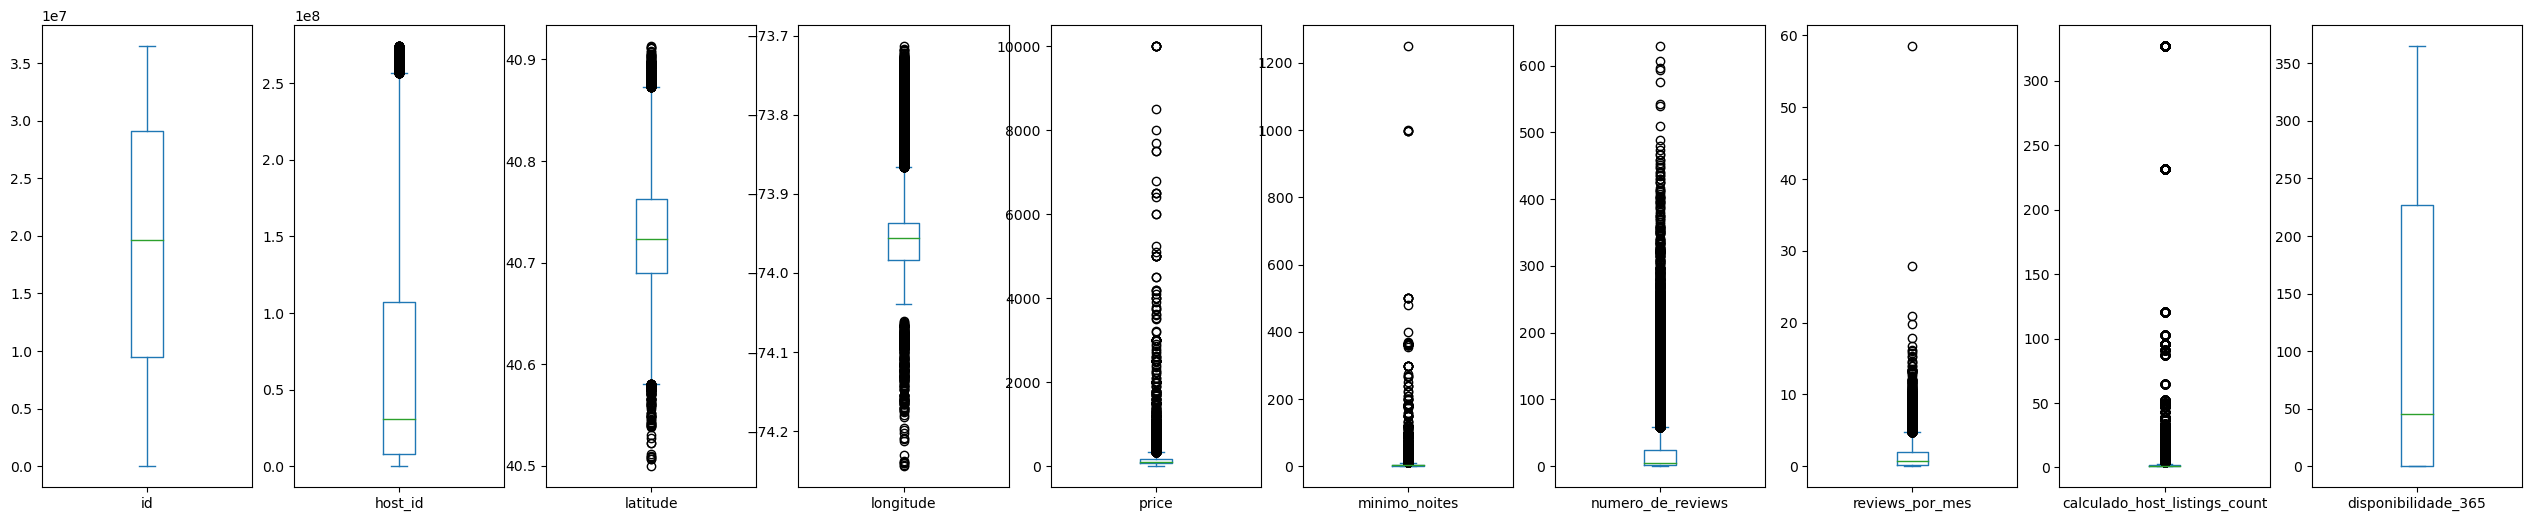

In [33]:
base.plot(kind='box',figsize=(32,6),subplots=True); 

##### O que seriam esses outliers?

In [34]:
base[base['numero_de_reviews'] >= 400]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
112,26785,Park Slope Green Guest House,42273,Dani,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,467,2018-12-30,4.22,2,192
136,31994,Room with En Suite Bathroom & Deck,137814,Waldemar,Brooklyn,Clinton Hill,40.68730,-73.96340,Private room,76,2,426,2019-06-24,3.89,3,275
224,58059,PRIVATE Room on Historic Sugar Hill,277379,Agnes,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,458,2019-07-03,4.58,2,258
256,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,Astoria,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226
397,126443,☆Massive DUPLEX☆ 2BR & 2BTH East Village 9+ Gu...,627217,Seith,Manhattan,East Village,40.72939,-73.98857,Entire home/apt,189,2,403,2019-07-07,4.10,3,201
434,151199,Astoria-Private Home NYC-,722320,Gladys & Bob,Queens,Astoria,40.75725,-73.91098,Entire home/apt,129,1,414,2019-07-03,4.34,1,245
470,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
533,195233,Hospitality on Propsect Pk-12 yrs Hosting Lega...,949221,Dennis,Brooklyn,Prospect-Lefferts Gardens,40.65513,-73.95641,Private room,43,1,401,2019-07-04,6.62,2,43
1102,467634,yahmanscrashpads,2321321,Lloyd,Queens,Jamaica,40.67747,-73.76493,Shared room,39,1,454,2019-06-18,5.27,1,353


#### Entendendo melhor essas informações

In [35]:
base.nome.value_counts()

nome
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47904, dtype: int64

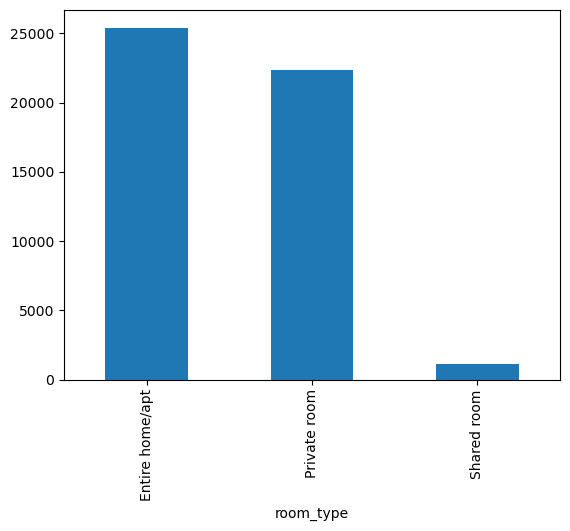

In [37]:
base.room_type.value_counts().plot(kind='bar');

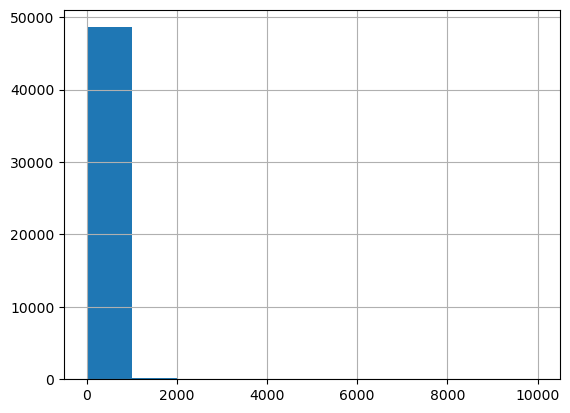

In [38]:
base['price'].hist();

In [40]:
base[base['price'] == base['price'].max()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaT,NaN,1,83


In [58]:
### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Bairros com média de preço mais alta:
 bairro
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


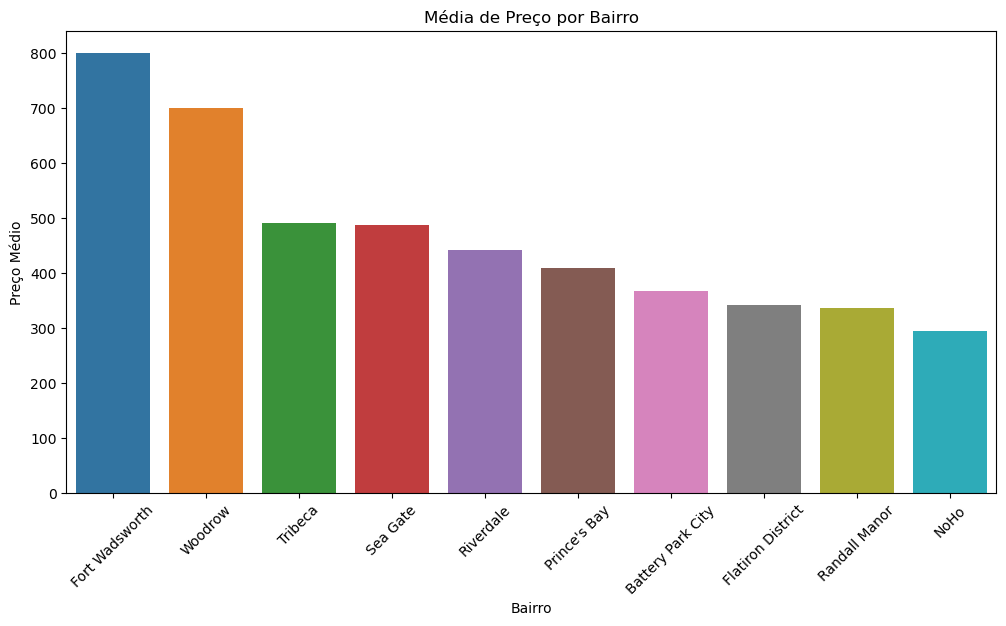

In [61]:
# Vamos analisar a média de preços por bairro
media_preco_por_bairro = base.groupby('bairro')['price'].mean().sort_values(ascending=False).head(10)
print("Bairros com média de preço mais alta:\n", media_preco_por_bairro)

# Visualizar a média de preços por bairro
plt.figure(figsize=(12, 6))
sns.barplot(x=media_preco_por_bairro.index, y=media_preco_por_bairro.values)
plt.xticks(rotation=45)
plt.title('Média de Preço por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.show()


In [62]:
### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


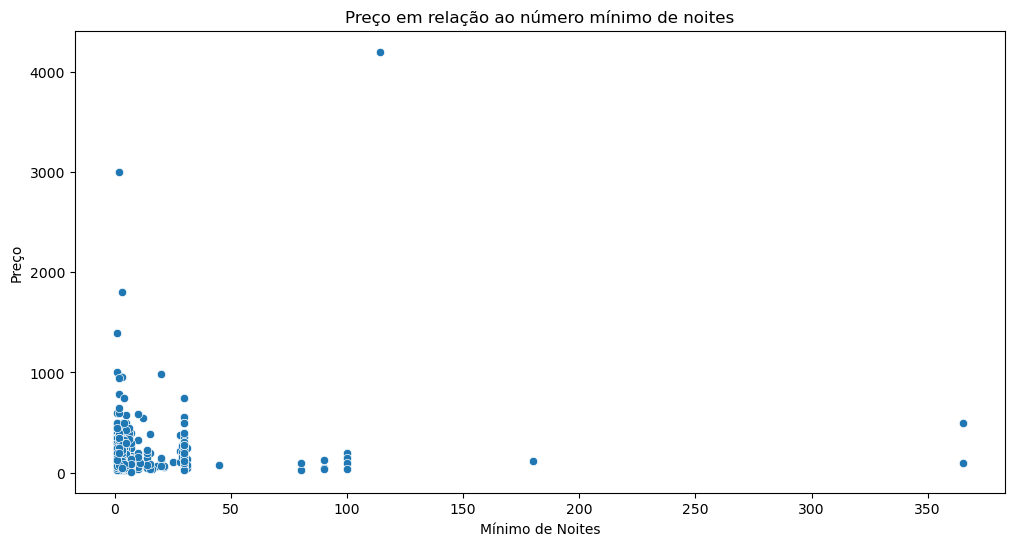

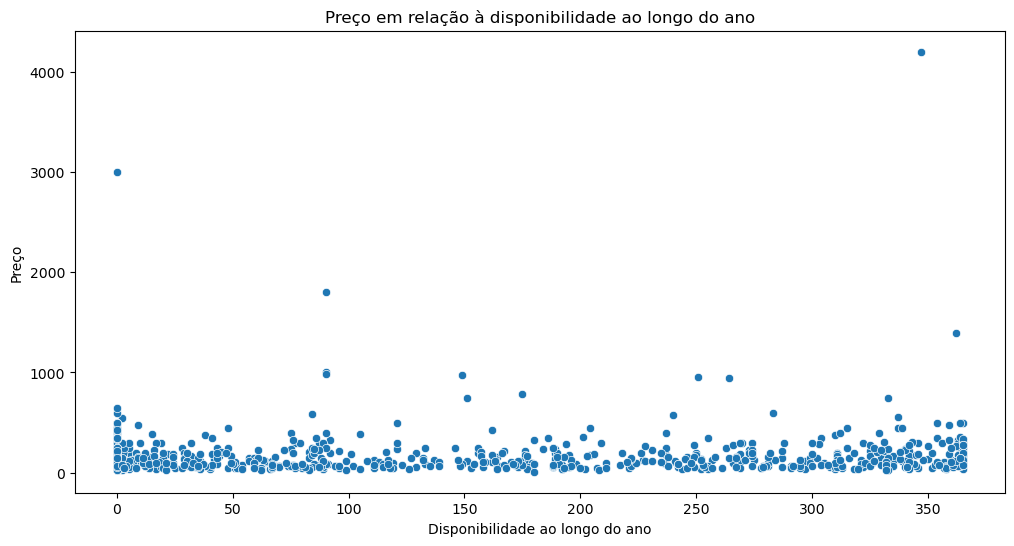

In [63]:
# Vamos plotar a relação entre o preço e o número mínimo de noites e a disponibilidade ao longo do ano

# Amostragem aleatória para reduzir o número de pontos
df_sampled = base.sample(n=1000)  # você pode ajustar o número de amostras conforme necessário

plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df_sampled)
plt.title('Preço em relação ao número mínimo de noites')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df_sampled)
plt.title('Preço em relação à disponibilidade ao longo do ano')
plt.xlabel('Disponibilidade ao longo do ano')
plt.ylabel('Preço')
plt.show()

In [88]:
### Existe algum padrão no texto do nome do local para lugares de mais alto valor?


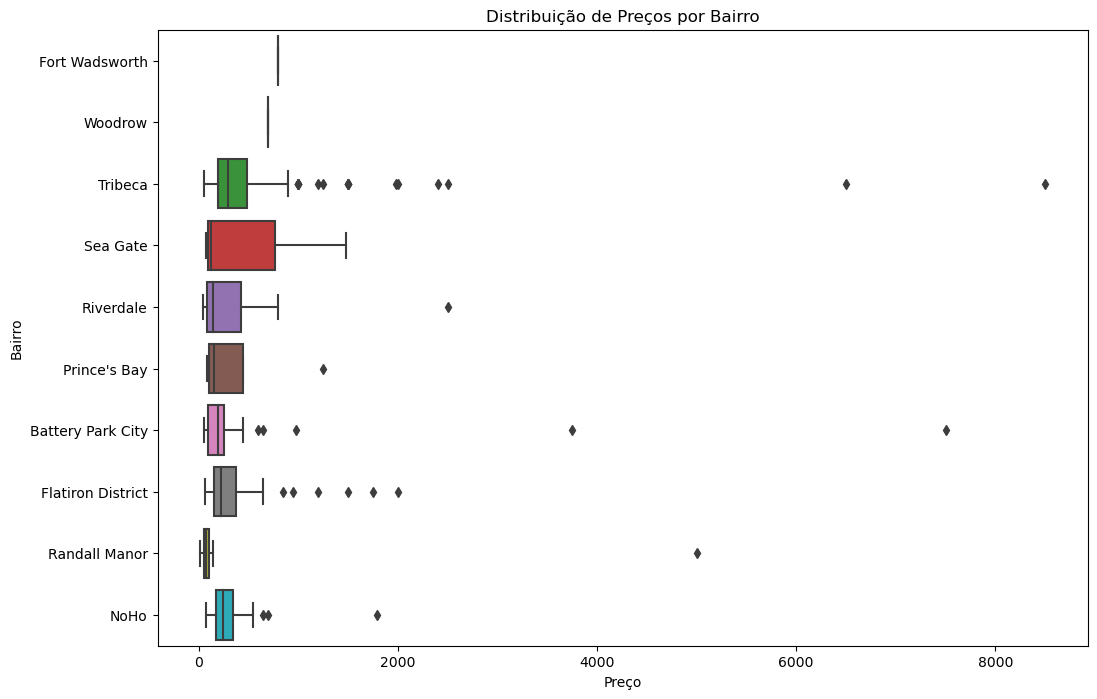

In [70]:
# Agrupar os dados por bairro e calcular estatísticas resumidas de preço
bairro_group_stats = base.groupby('bairro')['price'].describe()

# Selecionar os bairros com os preços médios mais altos
top_bairros = bairro_group_stats.sort_values(by='mean', ascending=False).head(10).index

# Filtrar o dataframe para incluir apenas os bairros selecionados
base_top_bairros = base[base['bairro'].isin(top_bairros)]

# Plotar um boxplot dos preços por bairro
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='bairro', data=df_top_bairros, order=top_bairros)
plt.title('Distribuição de Preços por Bairro')
plt.xlabel('Preço')
plt.ylabel('Bairro')
plt.show()

In [89]:

# Como você faria a previsão do preço a partir dos dados? Quais variáveis e/ou suas transformações você utilizou e por quê?

# Para prever o preço a partir dos dados, utilizei um modelo de regressão, que é a abordagem adequada quando queremos prever um valor contínuo (como o preço). As variáveis utilizadas no modelo foram:
# Variáveis numéricas: minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, e disponibilidade_365.
# Variáveis categóricas: bairro e room_type.
# Essas variáveis foram selecionadas com base na sua relevância para o problema em questão e após uma análise exploratória inicial dos dados. Para lidar com valores ausentes, apliquei imputação usando a estratégia da média para as variáveis numéricas e a estratégia da moda para as variáveis categóricas.
# Qual tipo de problema estamos resolvendo (regressão, classificação)?

# Estamos resolvendo um problema de regressão, onde nosso objetivo é prever um valor contínuo (o preço do aluguel) com base em um conjunto de variáveis explicativas.
# Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

# No caso específico, os modelos utilizados foram uma regressão linear e um modelo de Random Forest. Os resultados indicam que a regressão linear obteve um R² de 0.11, o que sugere que o modelo explica apenas uma pequena proporção da variação nos dados. Isso sugere que o modelo linear pode estar subajustado aos dados, enquanto um modelo mais complexo, como o Random Forest, pode ser capaz de capturar melhor a relação não linear entre as variáveis. No entanto, é importante notar que o Random Forest pode ser mais suscetível a overfitting e pode ser mais difícil de interpretar do que a regressão linear.
# Qual medida de performance do modelo foi escolhida e por quê?

# Para avaliar o desempenho do modelo, utilizei três métricas comuns para problemas de regressão:
# Mean Absolute Error (MAE): Mede a média absoluta dos erros entre as previsões e os valores reais. O MAE é fácil de interpretar, pois representa a magnitude média dos erros.
# Mean Squared Error (MSE): Mede a média dos quadrados dos erros. O MSE penaliza mais fortemente os erros maiores, o que pode ser útil em algumas situações.
# R-squared (R²): Representa a proporção da variância na variável dependente que é explicada pelas variáveis independentes no modelo. Um valor de R² mais próximo de 1 indica um melhor ajuste do modelo aos dados. No entanto, é importante considerar outras métricas além do R², especialmente em casos onde o modelo pode ser subajustado ou superajustado.


In [76]:
# Separar variáveis independentes (X) e variável dependente (y)
X = base.drop(columns=['price'])
y = base['price']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir transformações para variáveis numéricas e categóricas
numeric_features = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['bairro', 'room_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Treinar e avaliar modelos
for name, model in models.items():
    # Pipeline com preprocessor e modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Treinar modelo
    pipeline.fit(X_train, y_train)
    
    # Prever preços no conjunto de teste
    y_pred = pipeline.predict(X_test)
    
    # Avaliar desempenho do modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f"Model: {name}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R-squared (R²): {r2:.2f}")
    print("\n")

Model: Linear Regression
  Mean Absolute Error (MAE): 68.28
  Mean Squared Error (MSE): 44313.47
  R-squared (R²): 0.11


Model: Random Forest
  Mean Absolute Error (MAE): 66.39
  Mean Squared Error (MSE): 55823.90
  R-squared (R²): -0.12




In [90]:
# Supondo um apartamento com as seguintes características:
# {'id': 2595,
#  'nome': 'Skylit Midtown Castle',
#  'host_id': 2845,
#  'host_name': 'Jennifer',
#  'bairro_group': 'Manhattan',
#  'bairro': 'Midtown',
#  'latitude': 40.75362,
#  'longitude': -73.98377,
#  'room_type': 'Entire home/apt',
#  'price': 225,
#  'minimo_noites': 1,
#  'numero_de_reviews': 45,
#  'ultima_review': '2019-05-21',
#  'reviews_por_mes': 0.38,
#  'calculado_host_listings_count': 2,
#  'disponibilidade_365': 355}
#
# Qual seria a sua sugestão de preço?

In [84]:
# Filtrar os dados para apartamentos com características semelhantes
similar_apartments = base[(base['bairro'] == 'Midtown') & 
                        (base['room_type'] == 'Entire home/apt') & 
                        (base['minimo_noites'] == 1) & 
                        (base['numero_de_reviews'] >= 45)]

# Calcular o preço médio desses apartamentos
average_price = similar_apartments['price'].mean()
price = round(average_price, 2)
print("Preço médio dos apartamentos similares em Midtown, Manhattan:", price)

Preço médio dos apartamentos similares em Midtown, Manhattan: 211.33


In [93]:
# Salvar o DataFrame em um arquivo .pkl
base.to_pickle('dados.pkl')